# House Prices Final Machine Learning Project
## By: Isaac Jaramillo and Derrick Roberts

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Convinently, the data has already been split for us. The first thing we'll do is look at the data and clean it up before we can do anything with it.

In [140]:
# first need to load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

We'll clean up the training data first so that way we can explore it. There was a lot of issues with it and had to clean it up alot.

In [141]:
# We now need to explore the data and clean it up
# Starting with the training data
print(train_df.head())
train_df.shape

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2  \
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

(1460, 81)

In [142]:
# Print all label with NaN values
for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        print(col, train_df[col].isna().sum())

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


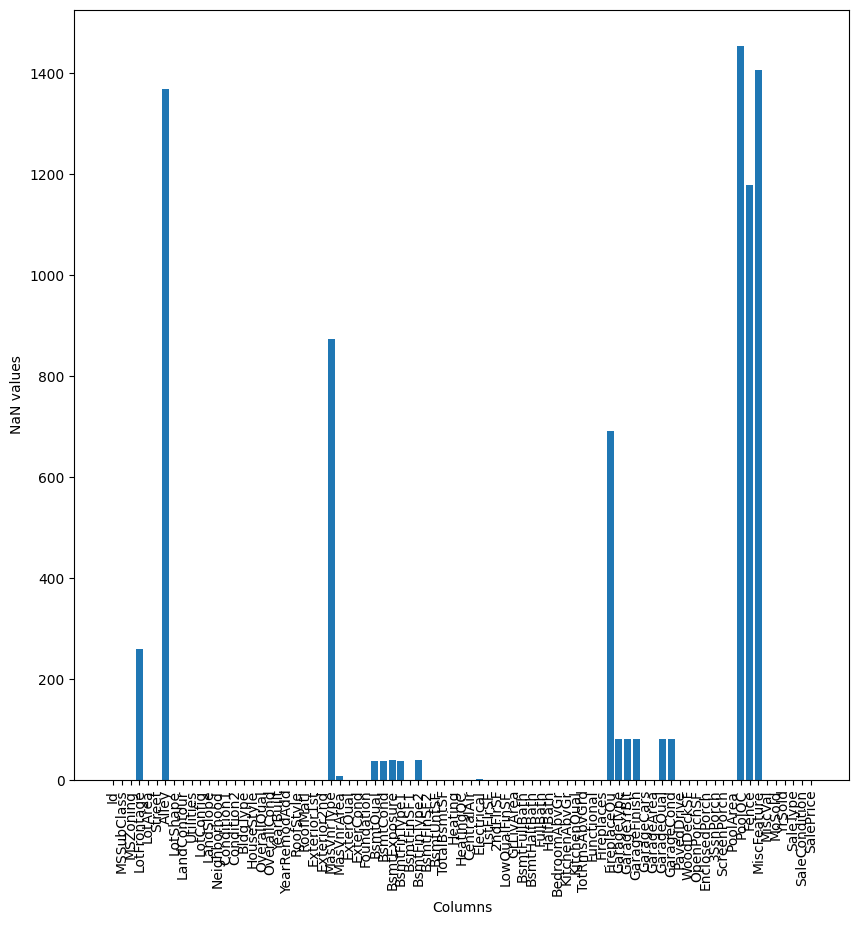

<Figure size 640x480 with 0 Axes>

In [143]:
# We can see that there are a lot of NaN values in the Alley, PoolQC, Fence, MiscFeature columns, let's graph them
missing_data = train_df.isna()
plt.figure(figsize=(10, 10))
# plt.title('NaN values in training data')
plt.xlabel('Columns')
plt.ylabel('NaN values')
plt.xticks(rotation=90)
plt.bar(train_df.columns, train_df.isna().sum())
plt.show()
plt.savefig('NaN_values_in_training_data.pdf')


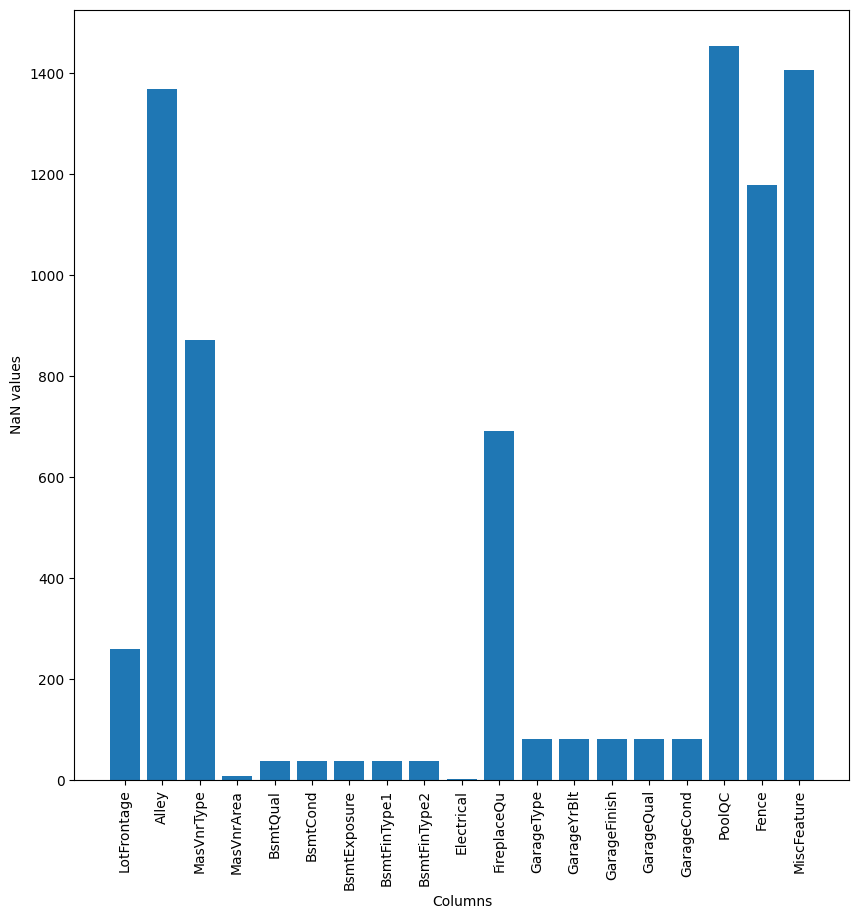

<Figure size 640x480 with 0 Axes>

In [144]:
# Only graph the columns with NaN values

# create a dictionary of columns with NaN values and number of NaN values
nandict = {}
for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        nandict[col] = train_df[col].isna().sum()

plt.figure(figsize=(10, 10))
plt.xlabel('Columns')
plt.ylabel('NaN values')
plt.xticks(rotation=90)
plt.bar(nandict.keys(), nandict.values())
plt.show()
plt.savefig('Only_NaN_values_in_training_data.pdf')

In [145]:
# Since null values are bad for training, we need to remove them
# For columns with over 60% of the data missing, we will remove them

drop_cols = []
for col in train_df.columns:
    if train_df[col].isna().sum() > 0.6 * len(train_df):
        drop_cols.append(col)

train_df = train_df.drop(drop_cols, axis=1)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [146]:
# Let's see how many NaN values are left
print(train_df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64


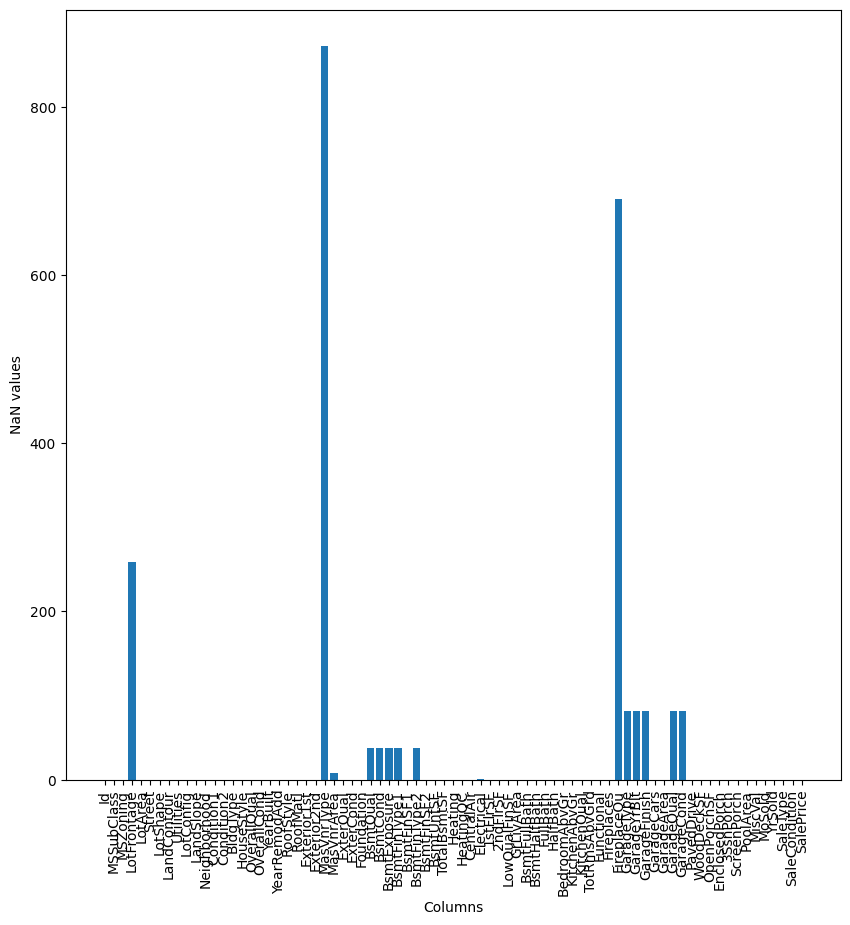

<Figure size 640x480 with 0 Axes>

In [147]:
# It's hard to see the NaN values in the graph now, so let's graph the columns with NaN values
plt.figure(figsize=(10, 10))
# plt.title('NaN values in training data')
plt.xlabel('Columns')
plt.ylabel('NaN values')
plt.xticks(rotation=90)
plt.bar(train_df.columns, train_df.isna().sum())
plt.show()
plt.savefig('NaN_values_in_training_data2.pdf')

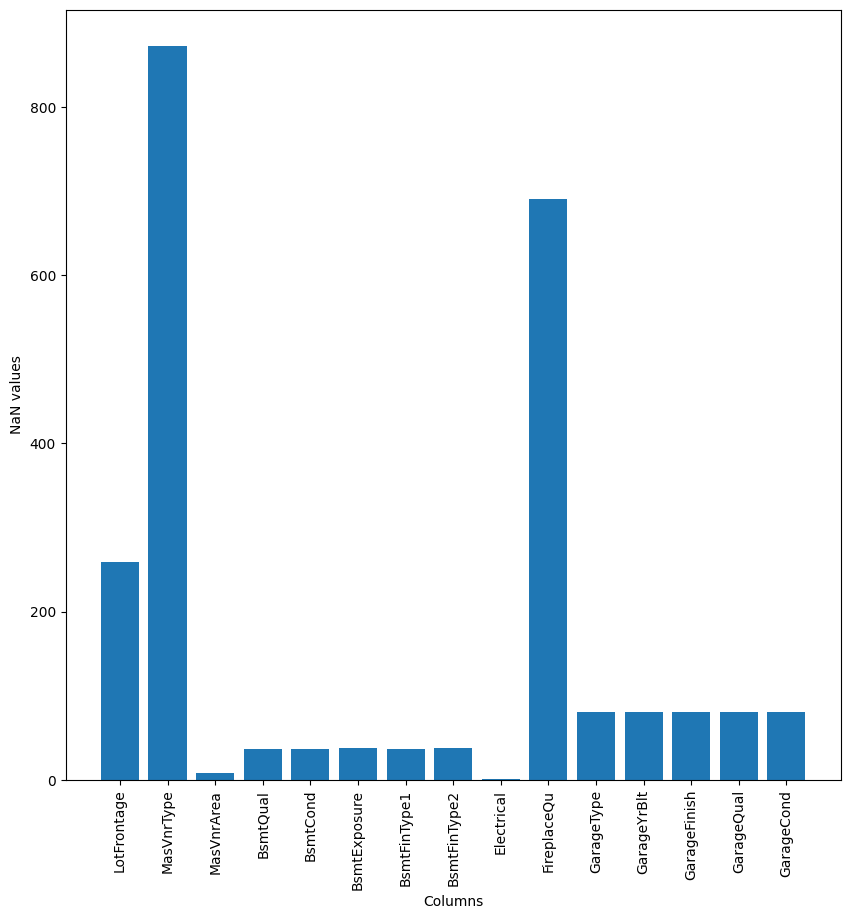

<Figure size 640x480 with 0 Axes>

In [148]:
nandict = {}
for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        nandict[col] = train_df[col].isna().sum()

plt.figure(figsize=(10, 10))
plt.xlabel('Columns')
plt.ylabel('NaN values')
plt.xticks(rotation=90)
plt.bar(nandict.keys(), nandict.values())
plt.show()
plt.savefig('Only_NaN_values_in_training_data2.pdf')

In [149]:
# print out the columns with NaN values
for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        print(col, train_df[col].isna().sum())

LotFrontage 259
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


For this next part, I went through the CSV and data to clean it up manually. However, there are ways to automate this part.
We just choose not to so that way we have complete control.

In [150]:
lot_frontage_mean = train_df['LotFrontage'].mean()
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(lot_frontage_mean)

# Fill masvnrtype with most common value
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])

train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode()[0])

train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageType'] = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mode()[0])
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])

# print out the columns with NaN values
for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        print(col, train_df[col].isna().sum())

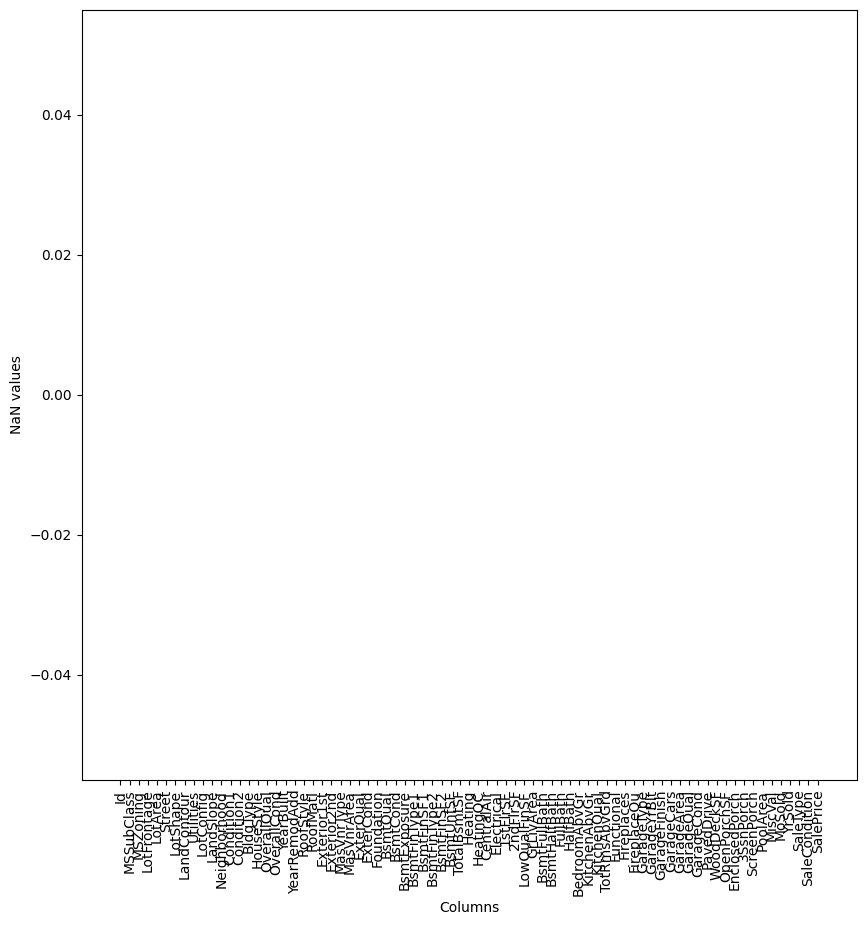

<Figure size 640x480 with 0 Axes>

In [151]:
# Let's graph one more tine just to make sure
plt.figure(figsize=(10, 10))
# plt.title('NaN values in training data')
plt.xlabel('Columns')
plt.ylabel('NaN values')
plt.xticks(rotation=90)
plt.bar(train_df.columns, train_df.isna().sum())
plt.show()
plt.savefig('NaN_values_in_training_data3.pdf')

In [152]:
# Print the shape of the training data
print(train_df.shape)
print(train_df.head())
print(train_df.info())

(1460, 77)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour   
0   1          60       RL         65.0     8450   Pave      Reg         Lvl  \
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea   
0    AllPub    Inside  ...             0         0           0        0  \
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePr

Now that the data has been cleaned and fixed any NaN values and verified so, we can start exploring the data.

We begin with onehotencoding the data, however we did run into issues with this. I did have google this part so I could do it manually.

In [153]:
train_df2 = pd.get_dummies(train_df, drop_first=True)
print(train_df2.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0   1          60         65.0     8450            7            5       2003  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw   
0          2003       196.0         706  ...           False           False  \
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleType_New  SaleType_Oth  SaleTyp

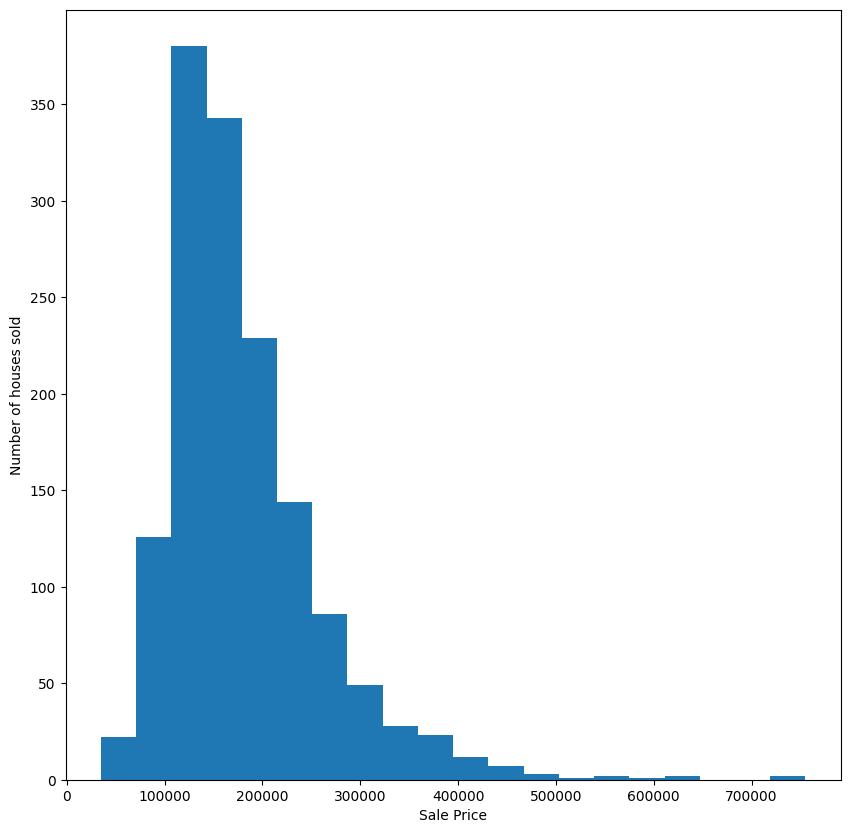

<Figure size 640x480 with 0 Axes>

In [154]:
X = train_df2.drop('SalePrice', axis=1)
y = train_df2['SalePrice']

# Graph the number of houses sold at each price
plt.figure(figsize=(10, 10))
# plt.title('Number of houses sold at each price')
plt.xlabel('Sale Price')
plt.ylabel('Number of houses sold')
plt.hist(y, bins=20)
plt.show()
plt.savefig('Number_of_houses_sold_at_each_price.pdf')

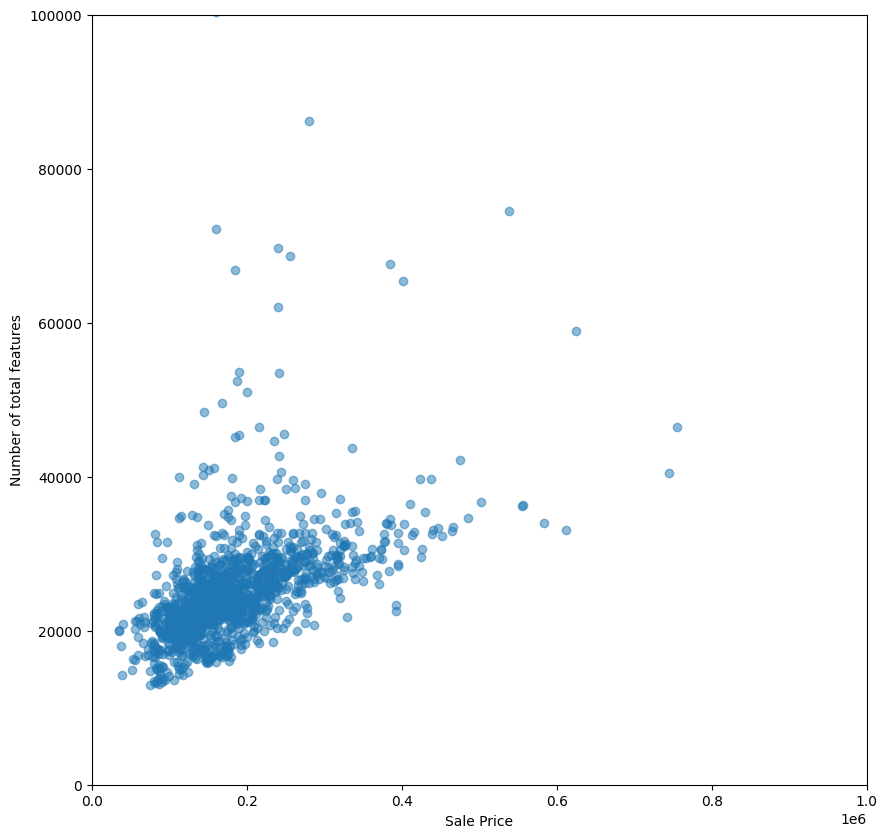

<Figure size 640x480 with 0 Axes>

In [155]:
# Graph number of total features for each price
plt.figure(figsize=(10, 10))
# plt.title('Number of total features for each price')
plt.xlabel('Sale Price')
plt.ylabel('Number of total features')
plt.scatter(y, X.sum(axis=1), alpha=0.5)
plt.xlim(0, 1000000)
plt.ylim(0, 100000)
plt.show()
plt.savefig('Number_of_total_features_for_each_price.pdf')

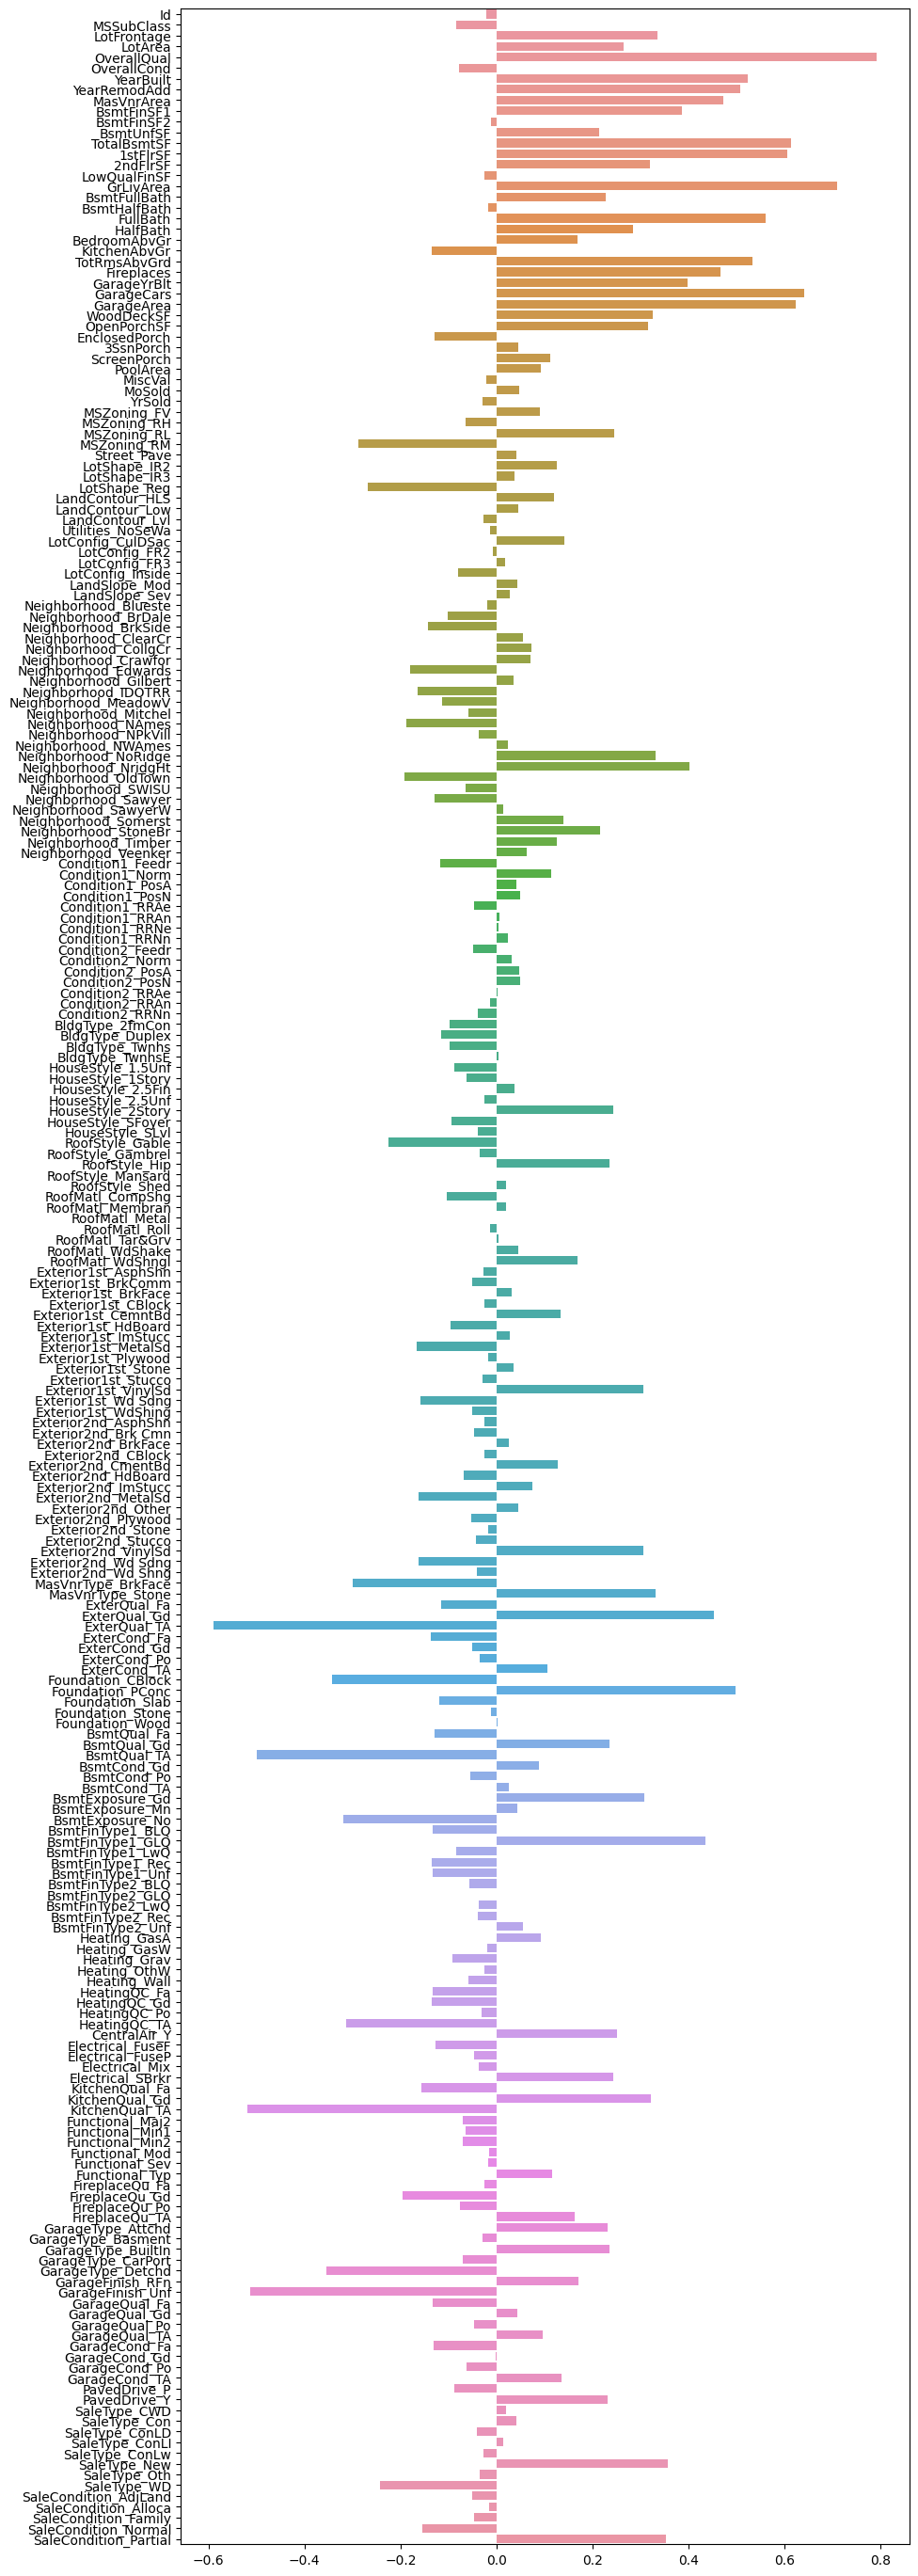

In [156]:
# Get correlations between features and target variable
corr = X.assign(y=y).corr()['y']

# drop last value since it is the correlation with itself
corr = corr[:-1]
ax, fig = plt.subplots(figsize=(10, 35))
sns.barplot(x=corr.values, y=corr.index)
# save the figure
plt.savefig('Correlation_between_features_and_target_variable.pdf')

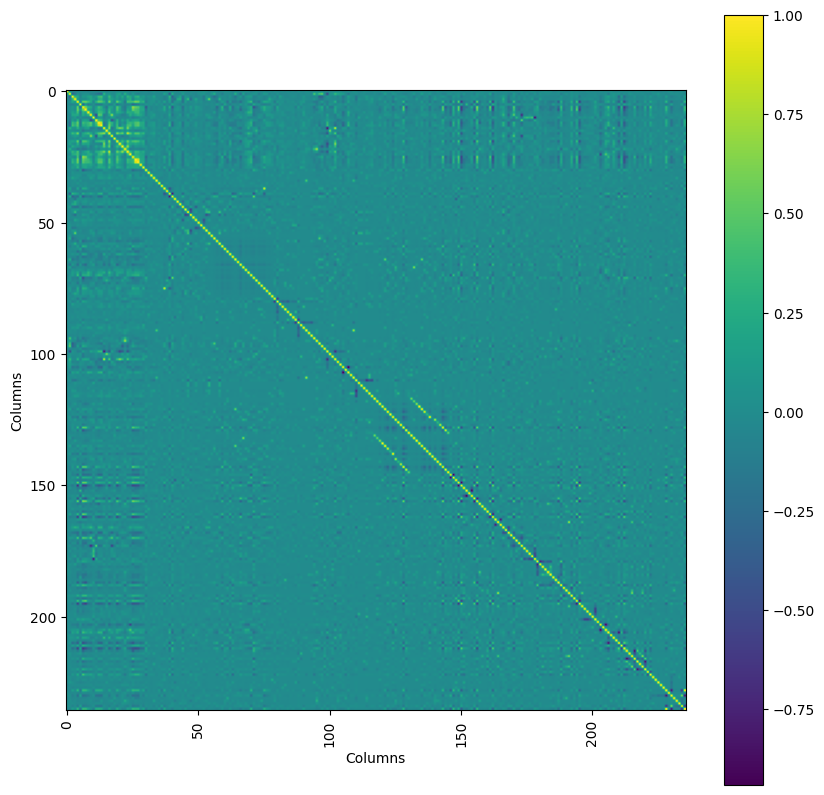

<Figure size 640x480 with 0 Axes>

In [157]:
# Create a heatmap of the correlations
plt.figure(figsize=(10, 10))
# plt.title('Correlation heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.imshow(X.corr())
plt.colorbar()
plt.show()
plt.savefig('Correlation_heatmap.pdf')

### Part 2: Cleaning up the testing code and matching it with the training data

In [158]:
# Now we need to also clean up the test data
# Print all label with NaN values
print(test_df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


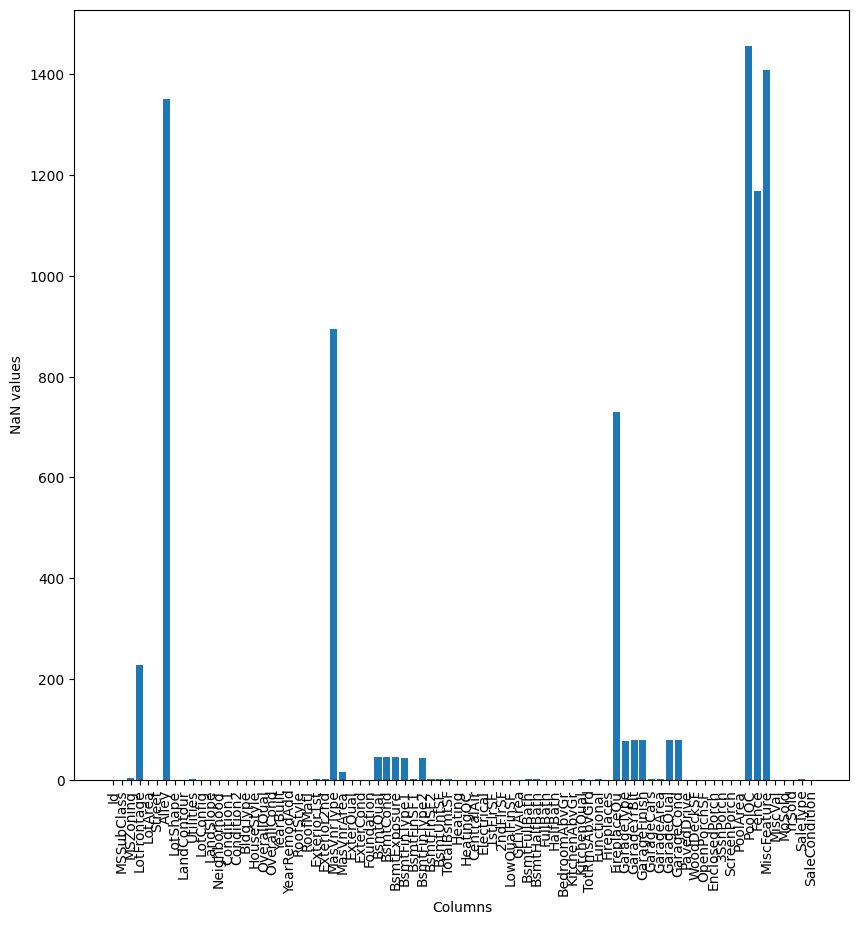

<Figure size 640x480 with 0 Axes>

In [159]:
# Let's graph the NaN values
plt.figure(figsize=(10, 10))
# plt.title('NaN values in test data')
plt.xlabel('Columns')
plt.ylabel('NaN values')
plt.xticks(rotation=90)
plt.bar(test_df.columns, test_df.isna().sum())
plt.show()
plt.savefig('NaN_values_in_test_data.pdf')

In [160]:
# We'll do the same and drop columns with over 60% of the data missing
drop_cols = []
for col in test_df.columns:
    if test_df[col].isna().sum() > 0.6 * len(test_df):
        drop_cols.append(col)
        
test_df = test_df.drop(drop_cols, axis=1)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [161]:
# Check for NaN values again
for col in test_df.columns:
    if test_df[col].isna().sum() > 0:
        print(col, test_df[col].isna().sum())

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
SaleType 1


In [162]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(lot_frontage_mean)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mode()[0])
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mode()[0])
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mode()[0])
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mode()[0])
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0])
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mode()[0])
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

# Check again
for col in test_df.columns:
    if test_df[col].isna().sum() > 0:
        print(col, test_df[col].isna().sum())

#### Now that the testing data has been cleaned up, we can concatenate it with the training data running some models

In [163]:
# Concatenate the training and test data
final_df = pd.concat([train_df, test_df], axis=0)

final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [164]:
# print out saleprice
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [165]:
final_df.shape

(2919, 77)

In [166]:
# let's one hot encode the data
final_df = pd.get_dummies(final_df)
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False


In [167]:
final_df.shape

(2919, 276)

In [168]:
# Split final data into training and test data
# Train stops before first NaN value in SalePrice
train_df2 = final_df.iloc[:1460, :]
test_df2 = final_df.iloc[1460:, :]

train_df2['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [169]:
print(train_df2.shape)
print(test_df2.shape)

print(train_df2['SalePrice'])

(1460, 276)
(1459, 276)
0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64


In [170]:
X_train = train_df2.drop(['SalePrice'], axis=1)
y_train = train_df2['SalePrice']

In [171]:
# Create a boosting tree regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


model = GradientBoostingRegressor()
model.fit(X_train, y_train)
acc = model.score(X_train, y_train)
mse = mean_squared_error(y_train, model.predict(X_train))
r2 = r2_score(y_train, model.predict(X_train))

pred = model.predict(test_df2.drop(['SalePrice'], axis=1))

print(f"Accuracy = {acc}")
print(f"MSE = {mse}")
print(f"R2 = {r2}")
print(pred)


Accuracy = 0.9666503255274971
MSE = 210329346.28829658
R2 = 0.9666503255274971
[122047.38033112 164114.6152134  176701.04671343 ... 161035.02881648
 114568.91859255 235513.62817404]


In [172]:
# Now that we have our predictions, let's do some basic feature selection, we'll start off with variance
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.4))

sel.fit(X_train)
sel.transform(X_train)
sel.get_support(indices=True)

# Print out labels of selected features
print(X_train.columns[sel.get_support(indices=True)])
filterLabels = X_train.columns[sel.get_support(indices=True)]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [173]:
# With these features, let's train the model again

newX_train = X_train[filterLabels]

model2 = GradientBoostingRegressor()
model2.fit(newX_train, y_train)

acc2 = model2.score(newX_train, y_train)
mse2 = mean_squared_error(y_train, model2.predict(newX_train))
r2_2 = r2_score(y_train, model2.predict(newX_train))

pred2 = model.predict(test_df2.drop(['SalePrice'], axis=1))

print(f"Accuracy = {acc2}")
print(f"MSE = {mse2}")
print(f"R2 = {r2_2}")
print(pred2)

Accuracy = 0.9598347914765069
MSE = 253313478.64414063
R2 = 0.9598347914765069
[122047.38033112 164114.6152134  176701.04671343 ... 161035.02881648
 114568.91859255 235513.62817404]


In [174]:
# Embedded
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression(penalty='l2', C=1.0, solver='newton-cg', multi_class='ovr')
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))

print('Intercept:', lr.intercept_)
np.set_printoptions(8)

# Print out labels of selected features
print(X_train.columns[lr.coef_[0]!=0])
embeddedLabels = X_train.columns[lr.coef_[0]!=0]

/Users/isaacjaramillo/miniconda3/envs/cs4371/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/isaacjaramillo/miniconda3/envs/cs4371/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/isaacjaramillo/miniconda3/envs/cs4371/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/isaacjaramillo/miniconda3/envs/cs4371/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Training accuracy: 0.002054794520547945
Intercept: [ 1.09216844e-06  7.09822833e-06  6.95537515e+01  7.42463630e-06
  1.01159526e-04  2.31443461e-07 -6.09094986e-06  3.22547953e-06
  5.53501571e-05  9.81749654e+01             nan  9.89413203e+01
 -1.61123113e-05 -3.29728404e-06  4.60978655e-05  1.83929123e-04
  9.48805746e-06  1.83870998e-05  3.78125932e-07  1.27668791e-06
  1.03314091e-06  3.05060291e-07  1.77217643e-05  3.21425482e-06
  5.11747336e-05  1.51542129e-04  6.97044909e-07             nan
 -2.37368404e-03 -1.00741406e-05  3.36098519e+01             nan
 -1.39766378e-03  2.30647938e-04  3.42824629e-06  4.75529890e-08
 -2.46412380e+02 -9.69462766e-06             nan             nan
  1.45931766e+02 -1.87815250e-06  2.27509043e-03  9.70474390e-06
  8.35471671e+01  5.79687657e+01  6.48538063e-07  2.71405262e-05
  1.56353077e-04  2.61490242e-06  1.23002817e-04  1.98928709e-06
  2.64392690e+02 -8.05930972e-08 -1.64056218e+02  9.46836573e+01
  6.50851956e-05 -7.66216896e+00  1.129

In [175]:
# With these features, let's train the model again

newX_train2 = X_train[embeddedLabels]

model3 = GradientBoostingRegressor()
model3.fit(newX_train2, y_train)

acc = model3.score(newX_train2, y_train)
mse = mean_squared_error(y_train, model3.predict(newX_train2))
r2 = r2_score(y_train, model3.predict(newX_train2))

pred3 = model3.predict(test_df2.drop(['SalePrice'], axis=1))

print(f"Accuracy = {acc}")
print(f"MSE = {mse}")
print(f"R2 = {r2}")
print(pred3)

Accuracy = 0.9666503255274971
MSE = 210329346.28829655
R2 = 0.9666503255274971
[122047.38033112 164114.6152134  176701.04671343 ... 161035.02881648
 118521.60750075 235513.62817404]


Since embedded and gradient booster gave us the best results, we'll embedded to give us results.

In [176]:
# create CSV file for submission
id = test_df['Id']
results = pd.DataFrame({'Id': id, 'SalePrice': pred3})

results.to_csv('submission.csv', index=False)